In [101]:
import os
import sys
path_base = os.getcwd()+"/.."
if path_base not in sys.path:
    sys.path.append(path_base)
    print(path_base)

import numpy as np
import shapely
import mfjet 

In [102]:
calc = mfjet.MFEuclideanCalculator(8)

In [118]:
coords = [
    [1,0],
    #[1,1],
    #[0,1]
]

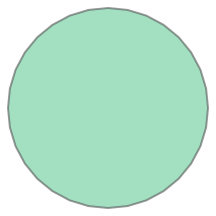

In [119]:
calc.create_dilated_points_by_disk(coords, 100, 8)

In [120]:
buf = calc.calc_mfs(coords, np.linspace(0,100,11)[1:],32)
print(buf.shape)

(10, 3)


In [121]:
buf2 = calc.calc_mfs_sequential(coords, np.linspace(0,100,1001)[::100][1:], 32)
print(buf2.shape)

(10, 3)


In [124]:
arr_r = np.linspace(0,100,11)[1:]

buf_asymtote = np.stack([
    np.ones_like(arr_r),
    2*np.pi*arr_r ,
    np.pi*arr_r**2
], axis=1)

'''
buf_asymtote = np.stack([
    np.ones_like(arr_r),
    2*np.pi*arr_r + (2 + np.sqrt(2)),
    np.pi*arr_r**2 + arr_r * (2 + np.sqrt(2)) + 0.5
], axis=1)
'''

'\nbuf_asymtote = np.stack([\n    np.ones_like(arr_r),\n    2*np.pi*arr_r + (2 + np.sqrt(2)),\n    np.pi*arr_r**2 + arr_r * (2 + np.sqrt(2)) + 0.5\n], axis=1)\n'

In [125]:
(buf - buf_asymtote) / (buf + buf_asymtote)

array([[ 0.00000000e+00, -5.02004119e-05, -2.00813743e-04],
       [ 0.00000000e+00, -5.02004119e-05, -2.00813743e-04],
       [ 0.00000000e+00, -5.02004119e-05, -2.00813743e-04],
       [ 0.00000000e+00, -5.02004119e-05, -2.00813743e-04],
       [ 0.00000000e+00, -5.02004119e-05, -2.00813743e-04],
       [ 0.00000000e+00, -5.02004119e-05, -2.00813743e-04],
       [ 0.00000000e+00, -5.02004119e-05, -2.00813743e-04],
       [ 0.00000000e+00, -5.02004119e-05, -2.00813743e-04],
       [ 0.00000000e+00, -5.02004119e-05, -2.00813743e-04],
       [ 0.00000000e+00, -5.02004119e-05, -2.00813743e-04]])

In [133]:
q=32
n=4*q
theta = np.pi / n
print((np.sin(theta) / theta - 1) / (np.sin(theta) / theta + 1))
print((np.sin(2.*theta) / 2./theta - 1) / (np.sin(2.*theta) / 2./theta + 1))

-5.020041188396627e-05
-0.0002008137432234961


In [117]:
(buf2 - buf_asymtote) / (buf2 + buf_asymtote)

array([[ 0.00000000e+00, -3.12762597e-05, -2.19388132e-04],
       [ 0.00000000e+00, -4.66299385e-05, -1.25979668e-04],
       [ 0.00000000e+00, -3.63075823e-05, -8.32665286e-05],
       [ 0.00000000e+00, -2.83915575e-05, -6.15945649e-05],
       [ 0.00000000e+00, -2.30139210e-05, -4.87861961e-05],
       [ 0.00000000e+00, -1.92786148e-05, -4.03744232e-05],
       [ 0.00000000e+00, -1.65701067e-05, -3.44355229e-05],
       [ 0.00000000e+00, -1.45304800e-05, -3.00330239e-05],
       [ 0.00000000e+00, -1.29336424e-05, -2.66385827e-05],
       [ 0.00000000e+00, -1.16534376e-05, -2.39374777e-05]])

In [110]:
(buf2 - buf_asymtote) / np.stack([
    np.ones_like(arr_r),
    arr_r,
    arr_r**2,
],axis=1)

array([[ 0.00000000e+00,  2.00970322e-04, -2.02603367e-04],
       [ 0.00000000e+00,  2.45466530e-05, -2.59427652e-05],
       [ 0.00000000e+00,  6.88943669e-06, -8.18348051e-06],
       [ 0.00000000e+00,  2.52712013e-06, -3.85064106e-06],
       [ 0.00000000e+00,  1.04412279e-06, -2.31336043e-06],
       [ 0.00000000e+00,  3.88788938e-07, -1.63459409e-06],
       [ 0.00000000e+00, -1.19915951e-08, -1.28023085e-06],
       [ 0.00000000e+00, -1.75289057e-07, -1.09443791e-06],
       [ 0.00000000e+00, -2.80586245e-07, -9.81333238e-07],
       [ 0.00000000e+00, -3.50891917e-07, -9.08982072e-07]])

In [111]:
(buf - buf2) / (buf+buf2)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  6.93562764e-10, -7.15948607e-08],
       [ 0.00000000e+00, -3.28220456e-09, -8.02762132e-08],
       [ 0.00000000e+00,  8.13508569e-10, -8.39257756e-08],
       [ 0.00000000e+00, -3.12701404e-09, -8.43556925e-08],
       [ 0.00000000e+00, -4.99479230e-09, -8.44228937e-08],
       [ 0.00000000e+00, -7.21246434e-10, -8.58922171e-08],
       [ 0.00000000e+00, -3.64870565e-09, -8.46230278e-08],
       [ 0.00000000e+00, -4.35888153e-09, -8.40013777e-08],
       [ 0.00000000e+00, -4.64322011e-09, -8.35852595e-08]])

In [42]:
(buf - buf2) / np.stack([
    np.ones_like(arr_r),
    arr_r,
    arr_r**2,
],axis=1)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  5.71376432e-08, -7.59192713e-06],
       [ 0.00000000e+00, -2.04843060e-06, -1.17394522e-05],
       [ 0.00000000e+00, -4.20197638e-06, -1.38155153e-05],
       [ 0.00000000e+00, -4.90173526e-06, -1.49271509e-05],
       [ 0.00000000e+00, -5.76225180e-06, -1.56094807e-05],
       [ 0.00000000e+00, -6.27034902e-06, -1.60954865e-05],
       [ 0.00000000e+00, -6.69491601e-06, -1.64617747e-05],
       [ 0.00000000e+00, -6.97675703e-06, -1.67451505e-05],
       [ 0.00000000e+00, -7.19237520e-06, -1.69706175e-05]])

In [24]:
buf[1,2]

1325.2817461685145

In [5]:
import numpy as np

In [7]:
a = np.array(0)

In [11]:
a

array(0)

In [12]:
import collections.abc

In [13]:
isinstance(a, collections.abc.Sequence)

False

In [15]:
a = np.array([0,1])
isinstance(a, collections.abc.Sequence)

False

In [19]:
np.ndim(np.array(0))

0